In [3]:
import matplotlib.pyplot as plt
import json, os, sys

In [27]:
def plot_curve(x_series, y_series, num):
    x_point = []
    y_point = []
    path = str("../src/allocated_memory/sampling{0}.data".format(num))
    
    with open(path, 'r') as f:
        line = f.readline()
        while line:
            hash = json.loads(line)
            x_point.append(hash[x_series])
            y_point.append(hash[y_series])
            line = f.readline()
    # print(x_point)
    # print(y_point)

    fig, ax = plt.subplots()
    # plt.ylim(0, 140)    
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel("Memory Size (megabytes)")
    plt.ylabel("Compute Charge (GB-seconds)")
    # plt.ylabel("Billed Duration (milliseconds)")
    plt.title("{0} vs. {1}".format("Memory size", "Compute Charge"), fontsize=10)
    plt.plot(x_point, y_point, 'b-')
    fig.savefig("../memory_compute_charge.png")

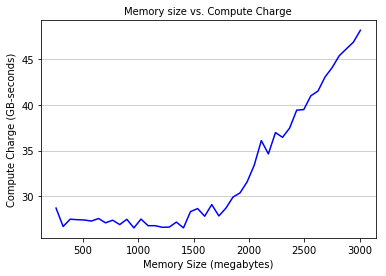

In [28]:
plot_curve('memory_size', 'compute_charge', 2)